In [23]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [20]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data)

print(df_market_data_scaled[:5])


[[ 0.50852937  0.49319307  0.77220043  0.23545963 -0.0674951  -0.35595348
  -0.25163688]
 [ 0.18544589  0.93444504  0.55869212 -0.05434093 -0.27348273 -0.11575947
  -0.19935211]
 [ 0.02177396 -0.70633685 -0.02168042 -0.06103015  0.00800452 -0.55024692
  -0.28206051]
 [-0.04076438 -0.81092807  0.24945797 -0.05038797 -0.37316402 -0.45825882
  -0.29554614]
 [ 1.19303608  2.00095907  1.76061001  0.54584206 -0.29120287 -0.49984776
  -0.27031695]]


In [19]:
# Create a DataFrame with the scaled data

df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_normalized = df_market_data.copy()

# Set the coinid column as index

# Display sample data
df_market_data_normalized.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


---

### Find the Best Value for k Using the Original Data.

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [24]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Loop through different k-values
for k in k_values:
    # Create a KMeans model with the current k-value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Append the model's inertia to the inertia_values list
    inertia_values.append(kmeans.inertia_)

In [25]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary with the data for the elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_data_df = pd.DataFrame({
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
})

print(elbow_data_df)


    Number of Clusters (k)     Inertia
0                        1  287.000000
1                        2  195.820218
2                        3  123.190482
3                        4   79.022435
4                        5   65.220364
5                        6   52.829819
6                        7   43.786435
7                        8   37.527740
8                        9   33.070926
9                       10   28.989073
10                      11   24.532527


In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_df.hvplot.line(x='Number of Clusters (k)', y='Inertia', title='Elbow Curve for Optimal k')


:Curve   [Number of Clusters (k)]   (Inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [28]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=42)

In [29]:
# Fit the K-Means model using the scaled data
clusters = model.fit_predict(df_market_data_scaled)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(predicted_clusters)



[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [31]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data_normalized.copy()

# Display sample data from the copied DataFrame
print(df_market_data_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [32]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['predicted_cluster'] = predicted_clusters

# Display sample data
print(df_market_data_copy.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [33]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    colormap="viridis",
    hover_cols=["coin_name"],
    width=800,
    height=500,
    title="Cryptocurrency Clusters"
)

scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [34]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [35]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(df_market_data_scaled)
df_pca_components = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
print(df_pca_components.head())



        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [36]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

# Print 
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f'Explained Variance Ratio for PC{i}: {ratio:.4f}')


Explained Variance Ratio for PC1: 0.3720
Explained Variance Ratio for PC2: 0.3470
Explained Variance Ratio for PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** If all added together then it would come out to 89.5

In [39]:
# Create a new DataFrame with the PCA data
df_pca_data = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca_data['coin_id'] = df_market_data_normalized.index

# Set the coin_id column as index
df_pca_data.set_index('coin_id', inplace=True)

# Display sample data
print(df_pca_data.head(10))


                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


---

### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))
print(k_values_pca)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [42]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # Create a KMeans model with the current k-value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data
    kmeans.fit(df_pca_components)
    
    # Append the model's inertia to the inertia_values_pca list
    inertia_values_pca.append(kmeans.inertia_)

In [43]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'k_values': k_values_pca,
    'inertia_values': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
print(elbow_df_pca)


    k_values  inertia_values
0          1      256.874086
1          2      168.811896
2          3       93.774626
3          4       49.665497
4          5       37.878747
5          6       27.618972
6          7       21.182776
7          8       17.091637
8          9       13.667065
9         10       10.559358
10        11        8.177490


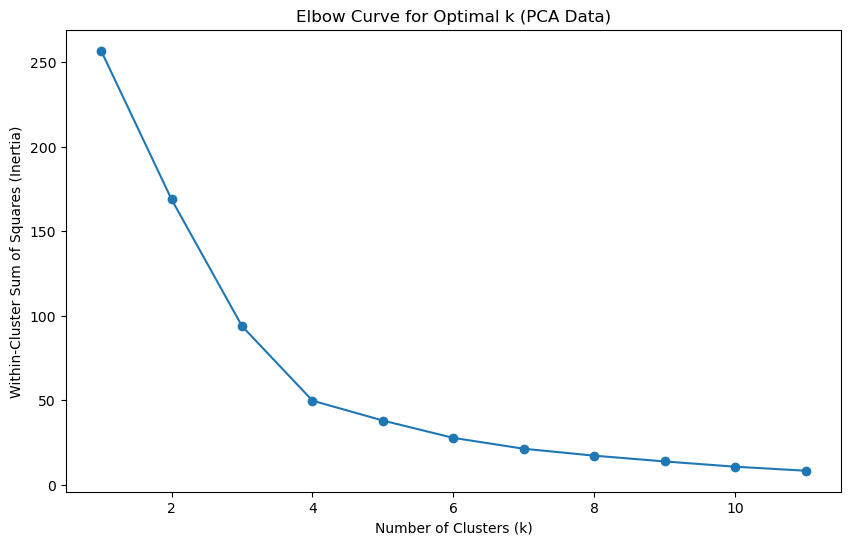

In [45]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(k_values_pca, inertia_values_pca, marker='o')
plt.title('Elbow Curve for Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, stayed the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
best_k = 4 
kmeans = KMeans(n_clusters=best_k, random_state=42)


In [47]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca_components)

KMeans(n_clusters=4, random_state=42)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans.predict(df_pca_components)

# Print the resulting array of cluster values
print(predicted_clusters_pca)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [49]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = predicted_clusters_pca

# Display sample data
print(df_pca_copy.head())

                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  3
ethereum     -0.458261  0.458466  0.952877                  3
tether       -0.433070 -0.168126 -0.641752                  0
ripple       -0.471835 -0.222660 -0.479053                  0
bitcoin-cash -1.157800  2.041209  1.859715                  3


In [50]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
import hvplot.pandas

# Create a scatter plot with PCA data and colored by predicted clusters
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",
    colormap="viridis",
    hover_cols=["coin_name"],
    width=800,
    height=500,
    title="PCA Scatter Plot with Predicted Clusters"
)

scatter_plot_pca


:Scatter   [PC1]   (PC2,predicted_cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [54]:
# Composite plot to contrast the Elbow curves

plt.figure(figsize=(10, 6))
plt.plot(k_values_pca, inertia_values_original, marker='o', label='Original Data')
plt.plot(k_values_pca, inertia_values_pca, marker='o', label='PCA Data')
plt.title('Elbow Curve Comparison: Original Data vs. PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.legend()
plt.show()


NameError: name 'inertia_values_original' is not defined

<Figure size 1000x600 with 0 Axes>

NameError: name 'df_market_data_clustered' is not defined

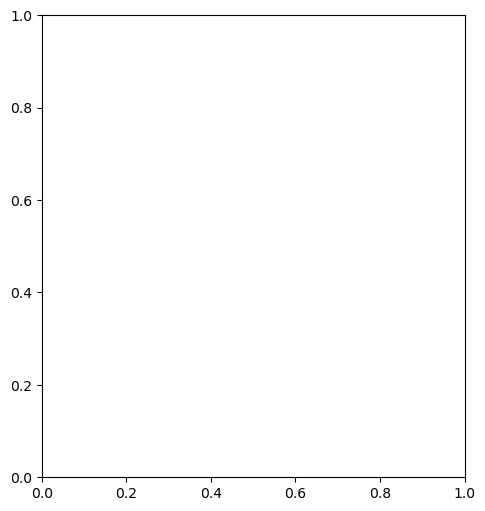

In [55]:
# Composite plot to contrast the clusters
import matplotlib.pyplot as plt

# Create scatter plots for both cases and display them side by side
plt.figure(figsize=(12, 6))

# Scatter plot for clusters using original data
plt.subplot(1, 2, 1)
plt.scatter(
    df_market_data_clustered['price_change_percentage_24h'],
    df_market_data_clustered['price_change_percentage_7d'],
    c=df_market_data_clustered['cluster'],  # Assuming you have a 'cluster' column
    cmap='viridis',
    marker='o'
)
plt.title('Clusters Using Original Data')
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')

# Scatter plot for clusters using PCA data
plt.subplot(1, 2, 2)
plt.scatter(
    df_pca_copy['PC1'],
    df_pca_copy['PC2'],
    c=df_pca_copy['predicted_cluster'],  # Assuming you have a 'predicted_cluster' column
    cmap='viridis',
    marker='o'
)
plt.title('Clusters Using PCA Data')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()

# Show plot
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 